In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

from sklearn.neighbors import KNeighborsClassifier


# setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columns on output
pd.set_option('display.max_columns', None)

#

#Exploratory Data Analysis
###Data as of 11/02/2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
murray_df = pd.read_excel("/content/drive/MyDrive/murray_data.xlsx")
murray_df.tail()

In [ ]:
# 10/25/19 Modern Warfare release date
# 12/03/19 MW season 1 release
##  1/03/20 Double XP weekend
##  1/17/20 Double XP weekend
## 09/29/20 Double XP
# 10/02/20 Double XP weekend
# 10/16/20 Double XP weekend
# 11/13/20 Cold War release date
# 11/24/20 Double XP weekend
# 12/16/20 Cold War season 1 release

# 12/26/20 Double XP weekend
##  1/15/21 Double XP weekend
##  9/03/21 Double XP weekend
# 10/01/21 Double XP weekend
# 10/07/21 Cold War season 6 release
# 10/22/21 Double XP weekend
# 11/05/21 Vanguard release date
# 12/08/21 Vanguard season 1 release
#  1/14/22 Double XP weekend

# 10/28/22 MW2 release date
# 11/16/22 MW2 season 1 release
## 12/01/22 Double XP weekend
# 12/15/22 Double XP weekend
#  9/15/23 Double XP weekend
#  9/27/23 MW2 season 6 release
# 10/27/23 MW2 Double XP
# 11/10/23 MW3 release date
# 11/22/23 Double XP weekend
## 12/06/23 MW3 season 1 release
#  9/18/24 MW3 season 6 release
# 10/07/24 announced call of duty partnership
# 10/25/24 BO6 release date

In [ ]:
murray_df.info() #only result is not an int or float, so lets map
murray_df['Result'] = murray_df['Result'].map({'W': 1.0, 'L': 0.0, 'T': 0.5})
murray_df.rename(columns = {"EPA": "Pass EPA", "Home Score" : "AZ Points", "Away Score" : "Opponent Points"}, inplace = True)

murray_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      71 non-null     int64  
 1   Week        71 non-null     int64  
 2   Cmp         71 non-null     int64  
 3   Att         71 non-null     int64  
 4   Yds         71 non-null     int64  
 5   TD          71 non-null     int64  
 6   INT         71 non-null     int64  
 7   Rating      71 non-null     float64
 8   YPA         71 non-null     float64
 9   Cmp %       71 non-null     float64
 10  CPOE        71 non-null     float64
 11  DB          71 non-null     int64  
 12  EPA         71 non-null     float64
 13  EPA/DB      71 non-null     float64
 14  TTT         71 non-null     float64
 15  Sack        71 non-null     int64  
 16  QBP         71 non-null     int64  
 17  QBP %       71 non-null     float64
 18  Home Score  71 non-null     int64  
 19  Away Score  71 non-null     int

,Season,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH
0,2019,1,29,54,308,2,1,75.20,5.70,53.70,-0.40,60,-8.50,-0.14,2.84,5,14,23.30,27,27,0.50,3,13,4.30,0,-1,-0.30,-0.40,0,0,0,0.00,0,2,0
1,2019,2,25,40,349,0,0,90.50,8.70,62.50,0.90,45,6.70,0.15,2.36,3,13,28.90,17,23,0.00,3,4,1.30,0,-6,-2.90,-3.30,1,0,0,0.00,0,2,0
2,2019,3,30,43,173,2,2,73.10,4.00,69.80,-7.20,55,-11.60,-0.21,2.45,8,17,30.90,20,38,0.00,8,69,8.60,0,29,3.60,5.90,0,0,2,0.30,3,7,0
3,2019,4,22,32,241,0,1,77.70,7.50,68.80,-6.60,39,-5.50,-0.14,2.98,4,13,33.30,10,27,0.00,4,27,6.80,1,9,3.00,3.00,0,0,11,2.70,1,3,0
4,2019,5,20,32,253,0,0,87.10,7.90,62.50,1.30,37,10.30,0.28,2.33,1,4,10.80,26,23,1.00,10,93,9.30,1,35,3.90,7.40,0,0,19,1.90,4,9,0


In [ ]:
# have to manually input only playoff game of Kyler Murray's career
postseason_df = pd.DataFrame([{
    "Season" : 2021,
    "Week" : 18,
    "Cmp" : 19,
    "Att" : 34,
    "Yds" : 137,
    "TD" : 0,
    "INT" : 2,
    "Rating" : 40.9,
    "YPA" : 4.0,
    "Cmp %" : 55.9,
    "CPOE" : -9.7,
    "DB" : 38,
    "Pass EPA" : -20,
    "EPA/DB" : -0.53,
    "TTT" : 2.96,
    "Sack" : 2,
    "QBP" : 15,
    "QBP %" : 39.5,
    "AZ Points" : 11,
    "Opponent Points" : 34,
    "Result" : 0.00,
    "Rush Att" : 2,
    "Rush Yards" : 6,
    "YPC" : 3.0,
    "Rush TDs" : 0,
    "RYOE" : -5,
    "RYOE/Att" : -2.5,
    "Rush EPA" : 2.2,
    "Fum" : 0,
    "Lost" : 0,
    "YACo" : 0,
    "YACo/Att" : 0,
    "10+ Yds" : 0,
    "15+ MPH" : 2,
    "20+ MPH" : 0
  }])
murray_df = pd.concat([murray_df, postseason_df], ignore_index=True)

murray_df["Turnovers"] = murray_df["INT"] + murray_df["Lost"]
murray_df["Total TDs"] = murray_df["TD"] + murray_df["Rush TDs"]
murray_df["Total EPA"] = murray_df["Pass EPA"] + murray_df["Rush EPA"]
murray_df.tail()

,Season,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH,Turnovers,Total TDs,Total EPA
67,2024,5,19,30,195,1,1,79.20,6.50,63.30,-8.20,33,-3.60,-0.11,2.47,1,7,21.20,24,23,1.00,7,83,11.90,1,36,7.20,5.90,1,0,3,0.40,3,4,1,1,2,2.30
68,2024,6,22,32,214,1,0,97.70,6.70,68.80,-3.60,36,-5.50,-0.15,2.57,0,7,19.40,13,34,0.00,7,14,2.00,0,-11,-2.70,-7.80,1,1,2,0.30,0,5,0,1,1,-13.30
69,2024,7,14,26,145,1,1,67.00,5.60,53.80,-9.40,29,3.60,0.12,2.75,0,9,31.00,17,15,1.00,6,64,10.70,1,47,11.70,4.10,0,0,2,0.40,2,4,0,1,2,7.70
70,2024,8,26,36,307,2,0,116.30,8.50,72.20,8.80,38,16.90,0.44,3.22,0,10,26.30,28,27,1.00,5,19,3.80,0,2,0.60,0.60,0,0,18,3.60,0,2,0,0,2,17.50
71,2021,18,19,34,137,0,2,40.90,4.00,55.90,-9.70,38,-20.00,-0.53,2.96,2,15,39.50,11,34,0.00,2,6,3.00,0,-5,-2.50,2.20,0,0,0,0.00,0,2,0,2,0,-17.80


In [ ]:
murray_df.describe()

,Season,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH,Turnovers,Total TDs,Total EPA
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,2021.04,8.62,23.03,34.62,240.64,1.46,0.71,93.60,7.07,66.82,-0.06,39.92,0.83,0.04,2.75,2.22,11.04,27.52,24.22,25.18,0.45,6.46,38.78,5.97,0.39,10.67,1.88,1.34,0.40,0.07,10.50,1.54,1.39,4.38,0.19,0.78,1.85,2.16
std,1.65,5.26,5.38,8.12,69.17,1.09,0.78,22.07,1.81,7.61,6.85,8.70,9.83,0.26,0.22,1.66,3.80,7.12,8.56,9.04,0.50,2.86,26.15,3.50,0.57,16.09,3.44,3.92,0.73,0.31,14.57,2.00,1.27,2.32,0.43,0.86,1.23,10.81
min,2019.00,1.00,9.00,15.00,104.00,0.00,0.00,40.90,4.00,37.50,-17.80,21.00,-26.60,-0.63,2.33,0.00,2.00,6.10,7.00,5.00,0.00,1.00,0.00,0.00,0.00,-17.00,-3.50,-10.60,0.00,0.00,-2.00,-0.20,0.00,0.00,0.00,0.00,0.00,-26.10
25%,2020.00,4.00,20.00,30.00,193.75,1.00,0.00,77.78,5.70,62.42,-3.92,35.00,-6.55,-0.14,2.61,1.00,9.00,23.30,17.00,20.00,0.00,5.00,19.75,3.30,0.00,-1.00,-0.20,-0.72,0.00,0.00,2.00,0.30,0.00,3.00,0.00,0.00,1.00,-5.10
50%,2021.00,8.00,23.00,34.00,241.00,1.00,1.00,92.10,6.80,66.70,0.95,39.00,2.60,0.07,2.75,2.00,11.00,27.90,25.00,24.50,0.00,6.00,32.50,5.95,0.00,7.00,1.35,0.90,0.00,0.00,5.00,0.80,1.00,4.00,0.00,1.00,2.00,3.15
75%,2022.00,13.00,27.00,39.00,274.75,2.00,1.00,104.20,7.83,71.50,3.52,45.00,7.60,0.19,2.90,3.00,13.25,33.30,30.00,31.50,1.00,8.00,59.00,8.05,1.00,20.00,3.30,3.52,1.00,0.00,12.25,1.90,2.00,5.25,0.00,1.00,3.00,9.62
max,2024.00,18.00,37.00,58.00,406.00,4.00,3.00,158.30,12.70,82.40,19.30,62.00,23.00,0.85,3.22,8.00,22.00,44.70,42.00,45.00,1.00,14.00,106.00,18.50,2.00,52.00,15.70,10.70,4.00,2.00,72.00,9.60,5.00,10.00,2.00,4.00,5.00,26.60


In [ ]:
kyler_cod_weeks = {
    (2019, 8), (2019, 14), (2020, 4), (2020, 6), (2020, 10),
    (2020, 12), (2020, 15), (2020, 16), (2021, 4), (2021, 5),
    (2021, 7), (2021, 14), (2021, 18), (2022, 8), (2023, 10),
    (2023, 12), (2024, 3), (2024, 6), (2024, 8)
}

# Create the "is_cod_week" column based on whether each row's (Season, Week) is in kyler_cod_weeks
murray_df['is_cod_week'] = murray_df.apply(
    lambda row: 1 if (row['Season'], row['Week']) in kyler_cod_weeks else 0,
    axis=1
)

murray_df.tail()

,Season,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH,Turnovers,Total TDs,Total EPA,is_cod_week
67,2024,5,19,30,195,1,1,79.20,6.50,63.30,-8.20,33,-3.60,-0.11,2.47,1,7,21.20,24,23,1.00,7,83,11.90,1,36,7.20,5.90,1,0,3,0.40,3,4,1,1,2,2.30,0
68,2024,6,22,32,214,1,0,97.70,6.70,68.80,-3.60,36,-5.50,-0.15,2.57,0,7,19.40,13,34,0.00,7,14,2.00,0,-11,-2.70,-7.80,1,1,2,0.30,0,5,0,1,1,-13.30,1
69,2024,7,14,26,145,1,1,67.00,5.60,53.80,-9.40,29,3.60,0.12,2.75,0,9,31.00,17,15,1.00,6,64,10.70,1,47,11.70,4.10,0,0,2,0.40,2,4,0,1,2,7.70,0
70,2024,8,26,36,307,2,0,116.30,8.50,72.20,8.80,38,16.90,0.44,3.22,0,10,26.30,28,27,1.00,5,19,3.80,0,2,0.60,0.60,0,0,18,3.60,0,2,0,0,2,17.50,1
71,2021,18,19,34,137,0,2,40.90,4.00,55.90,-9.70,38,-20.00,-0.53,2.96,2,15,39.50,11,34,0.00,2,6,3.00,0,-5,-2.50,2.20,0,0,0,0.00,0,2,0,2,0,-17.80,1


In [ ]:
murray_df[["Season", "Week", "is_cod_week"]].head(10)

,Season,Week,is_cod_week
0,2019,1,0
1,2019,2,0
2,2019,3,0
3,2019,4,0
4,2019,5,0
5,2019,6,0
6,2019,7,0
7,2019,8,1
8,2019,9,0
9,2019,10,0


In [ ]:
murray_df.groupby('is_cod_week').mean()

,Season,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH,Turnovers,Total TDs,Total EPA
is_cod_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2020.98,8.13,22.92,34.37,239.15,1.52,0.67,94.99,7.10,67.21,0.09,39.48,1.88,0.07,2.74,2.12,10.83,27.42,24.94,25.19,0.47,6.65,40.92,6.21,0.42,11.85,2.19,1.63,0.44,0.08,10.96,1.54,1.48,4.58,0.15,0.75,1.94,3.51
1,2021.20,9.90,23.30,35.30,244.50,1.30,0.80,90.00,6.99,65.78,-0.45,41.05,-1.91,-0.04,2.77,2.50,11.60,27.80,22.35,25.15,0.40,5.95,33.20,5.36,0.30,7.60,1.06,0.58,0.30,0.05,9.30,1.56,1.15,3.85,0.30,0.85,1.60,-1.33


In [ ]:
murray_df.groupby('Season').mean()

,Week,Cmp,Att,Yds,TD,INT,Rating,YPA,Cmp %,CPOE,DB,Pass EPA,EPA/DB,TTT,Sack,QBP,QBP %,AZ Points,Opponent Points,Result,Rush Att,Rush Yards,YPC,Rush TDs,RYOE,RYOE/Att,Rush EPA,Fum,Lost,YACo,YACo/Att,10+ Yds,15+ MPH,20+ MPH,Turnovers,Total TDs,Total EPA,is_cod_week
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019,8.81,21.81,33.88,232.62,1.25,0.75,88.78,6.94,65.07,-3.05,39.38,-1.31,-0.01,2.73,3.00,10.06,25.31,22.56,27.62,0.34,5.81,34.00,5.71,0.25,10.50,2.24,0.27,0.19,0.12,8.44,1.41,1.12,3.88,0.06,0.88,1.50,-1.04,0.12
2020,8.53,24.47,36.47,258.93,1.73,0.80,95.83,7.23,66.89,1.73,42.33,2.67,0.07,2.74,1.67,11.40,26.72,26.87,23.27,0.53,8.73,54.40,6.25,0.73,15.93,2.00,3.37,0.33,0.00,16.93,1.89,2.13,6.13,0.27,0.80,2.47,6.04,0.40
2021,9.80,23.47,34.33,261.60,1.60,0.80,98.91,7.72,68.87,2.57,39.20,3.04,0.10,2.78,2.20,11.87,30.01,26.40,22.40,0.60,6.00,28.60,4.96,0.33,4.60,0.73,0.55,0.67,0.00,4.73,0.82,0.93,3.60,0.27,0.80,1.93,3.59,0.40
2022,5.70,25.80,38.90,235.90,1.40,0.70,88.59,6.13,66.56,-0.70,45.10,-0.68,0.01,2.67,2.50,11.80,25.51,22.70,26.60,0.30,6.60,41.50,6.39,0.30,12.80,2.13,1.50,0.40,0.20,15.10,2.11,1.50,4.90,0.10,0.90,1.70,0.82,0.10
2023,14.00,22.00,33.50,224.88,1.25,0.62,90.12,6.82,65.80,-2.84,38.12,-2.22,-0.02,2.78,2.25,12.00,31.56,22.38,26.88,0.38,5.50,30.50,5.38,0.38,4.62,0.89,0.82,0.62,0.00,5.00,0.75,1.12,3.50,0.38,0.62,1.62,-1.40,0.25
2024,4.50,19.50,29.00,204.75,1.38,0.38,98.85,7.22,67.66,1.21,33.12,2.41,0.09,2.82,1.38,8.88,27.29,22.25,25.62,0.50,5.12,43.00,7.95,0.25,15.88,3.76,1.45,0.25,0.12,13.12,2.59,1.50,3.75,0.12,0.50,1.62,3.86,0.38


In [ ]:
murray_df.groupby(['Season', 'is_cod_week']).mean()

Week                  Cmp  \
Season is_cod_week                                             
2019   0                           8.50                22.14   
       1                          11.00                19.50   
2020   0                           7.22                25.67   
       1                          10.50                22.67   
2021   0                           9.00                23.00   
       1                          11.00                24.17   
2022   0                           5.44                25.22   
       1                           8.00                31.00   
2023   0                          15.00                21.67   
       1                          11.00                23.00   
2024   0                           3.80                17.40   
       1                           5.67                23.00   

                                    Att                  Yds  \
Season is_cod_week                                             
2019   0                          34.21               236.29   
       1                          31.50               207.00   
2020   0                          37.78               277.22   
       1                          34.50               231.50   
2021   0                          33.56               266.22   
       1                          35.50               254.67   
2022   0                          38.33               225.89   
       1                          44.00               326.00   
2023   0                          31.83               215.67   
       1                          38.50               252.50   
2024   0                          26.00               182.00   
       1                          34.00               242.67   

                                     TD                  INT  \
Season is_cod_week                                             
2019   0                           1.29                 0.64   
       1                           1.00                 1.50   
2020   0                           1.89                 0.89   
       1                           1.50                 0.67   
2021   0                           1.89                 0.78   
       1                           1.17                 0.83   
2022   0                           1.22                 0.56   
       1                           3.00                 2.00   
2023   0                           1.50                 0.67   
       1                           0.50                 0.50   
2024   0                           1.40                 0.40   
       1                           1.33                 0.33   

                                 Rating                  YPA  \
Season is_cod_week                                             
2019   0                          91.11                 6.99   
       1                          72.50                 6.60   
2020   0                          97.50                 7.50   
       1                          93.33                 6.83   
2021   0                         103.21                 8.04   
       1                          92.47                 7.23   
2022   0                          87.82                 5.99   
       1                          95.50                 7.40   
2023   0                          94.47                 6.85   
       1                          77.10                 6.75   
2024   0                         100.06                 7.30   
       1                          96.83                 7.10   

                                  Cmp %                 CPOE  \
Season is_cod_week                                             
2019   0                          65.49                -2.59   
       1                          62.15                -6.30   
2020   0                          68.34                 3.54   
       1                          64.72                -0.98   
2021   0                          69.18                 3.47   

#Graphs


# An NFL Star's Call of Duty Addiction: Does Gaming Truly Have An Effect on this QB's Performance?


### Introduction

Two years ago, a Reddit post titled “A statistical analysis of Kyler Murray’s performance on COD double XP weekends” went viral, making waves in online NFL circles. It claimed that the Arizona Cardinals’ young quarterback performed worse on the field during weekends when promotional events were held on the video game series Call of Duty. At the time, Murray had just signed a massive five-year, $230.5 million contract extension with the Cardinals, but there was something interesting in the fine print. Dubbed the “homework clause,” the contract required the young QB to complete four hours of “independent study” per game week, explicitly stating that time distracted by video games would not count.

Kyler’s love for Call of Duty has been well-documented. He has a history of streaming the video game series live on Twitch, he has signed with the popular esports organization FaZe Clan, and has recently partnered with the Call of Duty franchise to promote their newest release, Black Ops 6. While the former Heisman winner denies any effect of video games on his performance, the unique contract conditions and Reddit post sparked our interest. Was this more than a joke?  Analyzing data from throughout Murray’s professional career and comparing it to the Call of Duty events schedule, we set out to determine whether Kyler’s affinity for the games off the field might really be affecting his play on the field.

### Background

Expanding on the initial Reddit post's ideas, we looked to find every Call of Duty event in the series that could have distracted Kyler Murray from his day job. These events have come in the form of double XP earning weekends, releases of new video game titles for the franchise, Battle Royale or "Warzone" season releases, and Murray's video game-related partnerships. All of the events recorded had to have occurred or commenced between a week or a day leading up to the week's game, so this left us with 19 out of Kyler Murray's 72 career games (as of 11/02/2024) having a potential Call of Duty impact.

The main metrics we used to define the potential difference in performance are the following:


Total EPA - Expected Points Added, or the total points the player contributes
            to the team based on expected outcome of each play and drive

Pass EPA - Expected Points Added through passing the football

Rush EPA - Expected Points Added through rushing with the football

Yds - Passing Yards

YPA - Passing Yards per passing attempt

CPOE - Completion Percentage Over Expected

AZ Score - Points scored on offense by the Cardinals

Rating - Passer Rating

Turnovers - Total combined Turnovers form Interceptions and Lost Fumbles

Total TDs - Total combined Passing and Rushing Touchdowns





### Overall Differences in Statistics

To examine the relationship between Kyler Murray's performance in games played directly after or during a Call of Duty event, such as a double XP weekend or the release of a new game, against games played without the outside influence of CoD, we will examine the overall trend of key statistics such as EPA and rating.

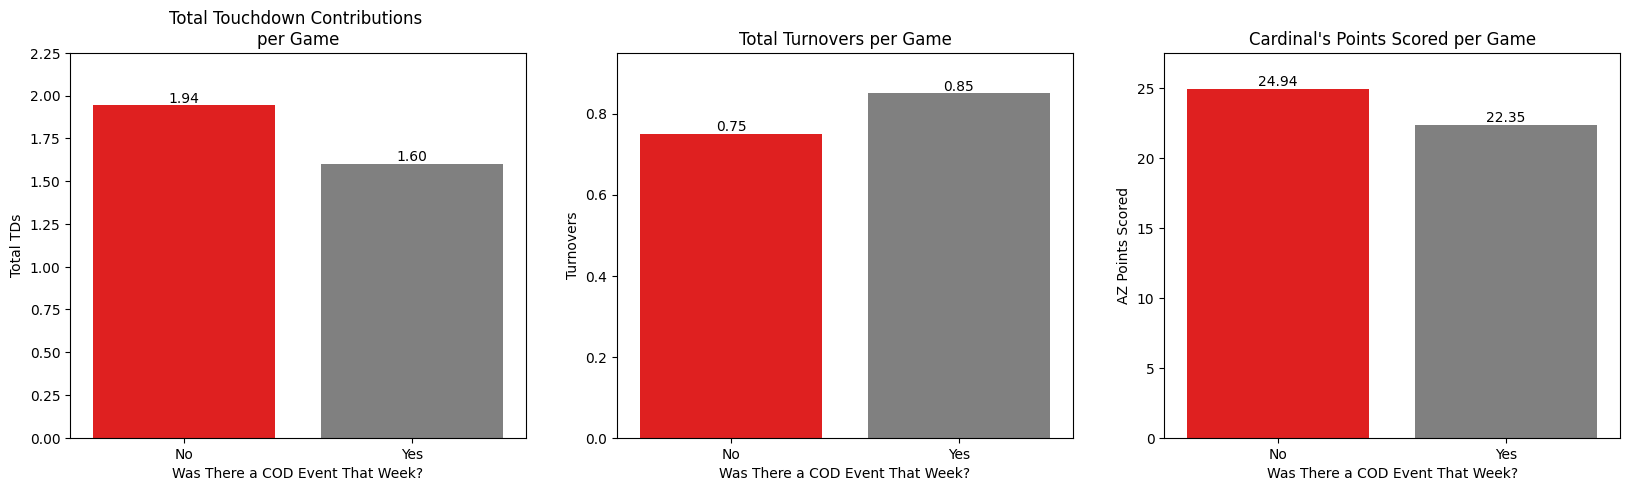

In [ ]:
# sns.barplot(data = murray_df, x = "is_cod_week", y = "Total EPA", ci = None)
#grouped_by_cod_impact_df.head()
# plt.bar(grouped_by_cod_impact_df.index, grouped_by_cod_impact_df['Total EPA'], label='Total EPA')

grouped_by_year_df = murray_df.groupby('Season').mean()
grouped_by_cod_impact_df = murray_df.groupby('is_cod_week').mean()
grouped_by_cod_impact_df.head()

plt.figure(figsize=(20, 5))



plt.subplot(1, 3, 1)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "Total TDs",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Total Touchdown Contributions \nper Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Total TDs")
plt.ylim(0, 2.25)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the text horizontally
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)


plt.subplot(1, 3, 2)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "Turnovers",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Total Turnovers per Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Turnovers")
plt.ylim(0, 0.95)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the text horizontally
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)


plt.subplot(1, 3, 3)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "AZ Points",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Cardinal's Points Scored per Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("AZ Points Scored")
plt.ylim(0, 27.5)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the text horizontally
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)



plt.show()

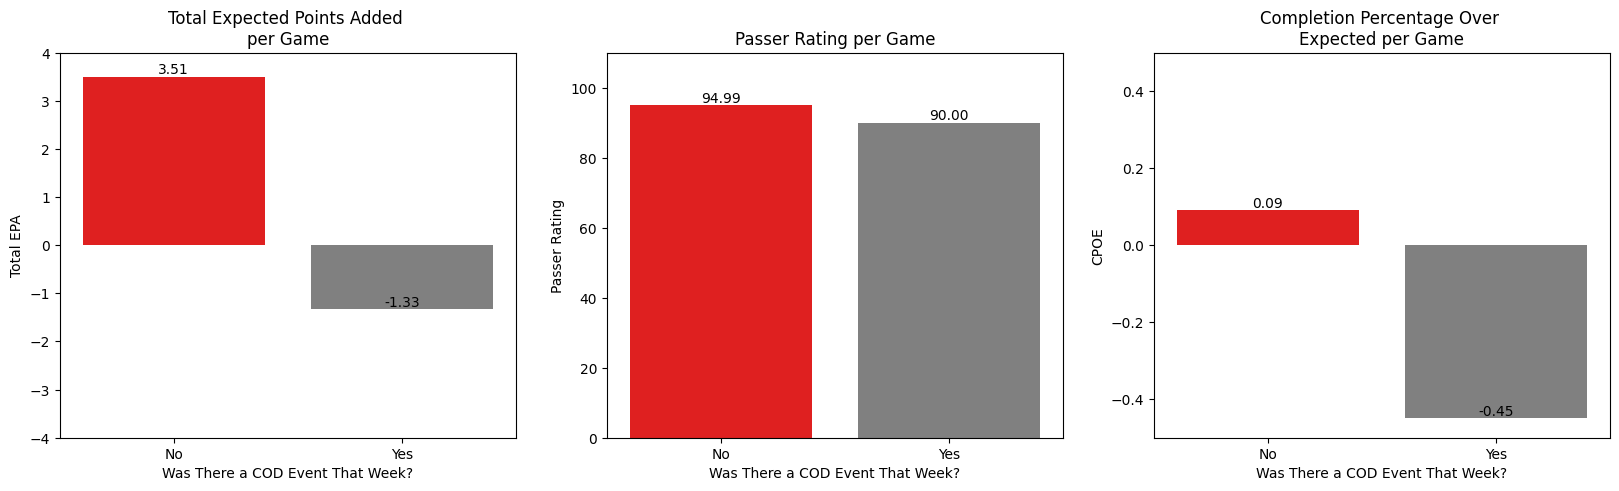

In [ ]:
plt.figure(figsize=(20, 5))


plt.subplot(1,3,1)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "Total EPA",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Total Expected Points Added \nper Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Total EPA")
plt.ylim(-4, 4)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)


plt.subplot(1, 3, 2)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "Rating",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Passer Rating per Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Passer Rating")
plt.ylim(0, 110)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the text horizontally
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)


plt.subplot(1, 3, 3)
ax = sns.barplot(data = grouped_by_cod_impact_df,
            x = "is_cod_week",
            y = "CPOE",
            palette = {0: 'red', 1: 'gray'},
            hue = 'is_cod_week',
            legend = False,
            errorbar = None)
plt.title("Completion Percentage Over \nExpected per Game")
plt.xlabel("Was There a COD Event That Week?")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("CPOE")
plt.ylim(-0.5, 0.5)
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Center the text horizontally
    plt.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)




plt.show()

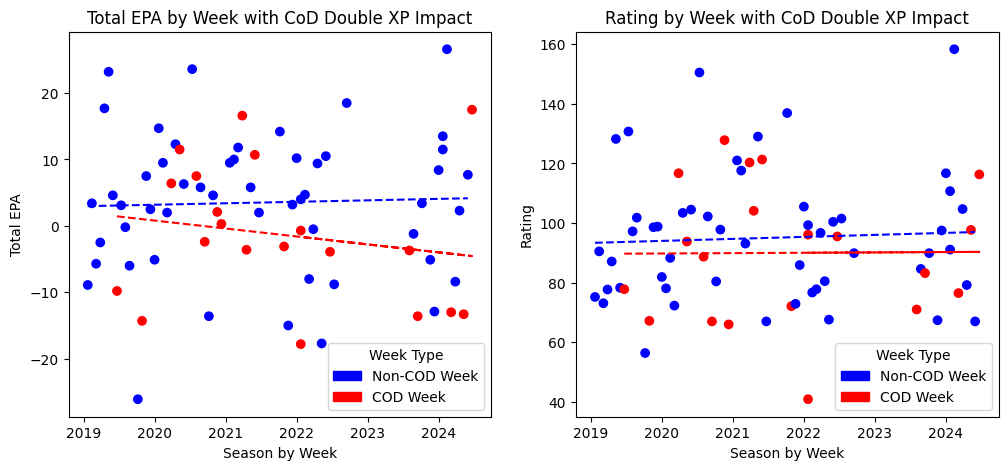

In [ ]:
murray_df['Season-Week'] = murray_df['Season'] + ( murray_df['Week'] / 17 )
murray_df['Total EPA'] = murray_df['Pass EPA'] + murray_df['Rush EPA']

plt.figure(figsize=(12, 5))
plt.subplot(1,2,2)

#first scatter plot with passing EPA
#map the colors blue and red, blue will be for non Call of Duty weeks
cmap = mcolors.ListedColormap(['blue', 'red'])

plt.scatter(murray_df['Season-Week'], murray_df['Rating'], c=murray_df['is_cod_week'], cmap=cmap)

#plot trend line for non call of duty weeks in blue
kyler_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], murray_df[murray_df['is_cod_week'] == 0]['Rating'], 1)
kyler_trendline = np.polyval(kyler_trend, murray_df[murray_df['is_cod_week'] == 0]['Season-Week'])

#plot trend line for call of duty weeks in red
cod_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], murray_df[murray_df['is_cod_week'] == 1]['Rating'], 1)
cod_trendline = np.polyval(cod_trend, murray_df[murray_df['is_cod_week'] == 1]['Season-Week'])

plt.plot(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], kyler_trendline, color='blue', linestyle='--', label='Non CoD Trend')
plt.plot(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], cod_trendline, color='red', linestyle='--', label='CoD Trend')
plt.title('Rating by Week with CoD Double XP Impact')
plt.xlabel('Season by Week')
plt.ylabel('Rating')

legend_handles = [
    mpatches.Patch(color=cmap(0), label='Non-COD Week'),  # color for "0" (non-COD)
    mpatches.Patch(color=cmap(1), label='COD Week')       # color for "1" (COD)
]
plt.legend(handles=legend_handles, title="Week Type")






plt.subplot(1,2,1)

#third scatter plot with overall EPA
cmap = mcolors.ListedColormap(['blue', 'red'])

plt.scatter(murray_df['Season-Week'], murray_df['Total EPA'], c=murray_df['is_cod_week'], cmap=cmap)

kyler_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], murray_df[murray_df['is_cod_week'] == 0]['Total EPA'], 1)
kyler_trendline = np.polyval(kyler_trend, murray_df[murray_df['is_cod_week'] == 0]['Season-Week'])

cod_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], murray_df[murray_df['is_cod_week'] == 1]['Total EPA'], 1)
cod_trendline = np.polyval(cod_trend, murray_df[murray_df['is_cod_week'] == 1]['Season-Week'])

plt.plot(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], kyler_trendline, color='blue', linestyle='--', label='Non CoD Trend')
plt.plot(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], cod_trendline, color='red', linestyle='--', label='CoD Trend')
plt.title('Total EPA by Week with CoD Double XP Impact')
plt.xlabel('Season by Week')
plt.ylabel('Total EPA')

legend_handles = [
    mpatches.Patch(color=cmap(0), label='Non-COD Week'),  # color for "0" (non-COD)
    mpatches.Patch(color=cmap(1), label='COD Week')       # color for "1" (COD)
]
plt.legend(handles=legend_handles, title="Week Type")









plt.show()

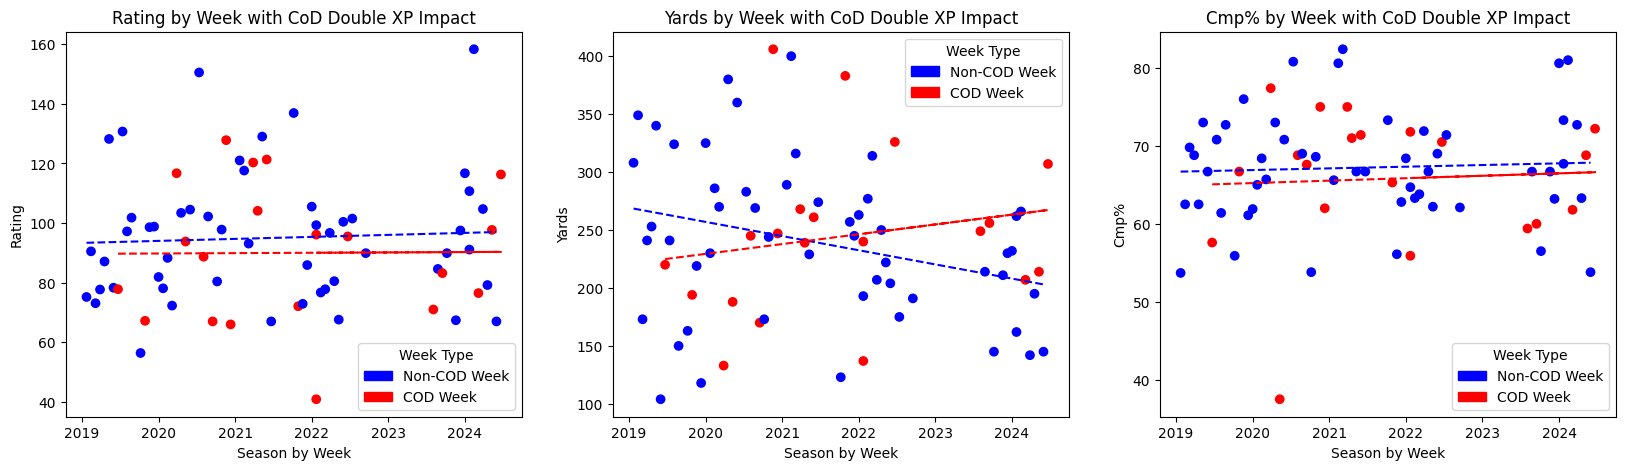

In [ ]:
plt.figure(figsize=(20, 5))


plt.subplot(1,3,1)

cmap = mcolors.ListedColormap(['blue', 'red'])

plt.scatter(murray_df['Season-Week'], murray_df['Rating'], c=murray_df['is_cod_week'], cmap=cmap)

kyler_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], murray_df[murray_df['is_cod_week'] == 0]['Rating'], 1)
kyler_trendline = np.polyval(kyler_trend, murray_df[murray_df['is_cod_week'] == 0]['Season-Week'])

cod_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], murray_df[murray_df['is_cod_week'] == 1]['Rating'], 1)
cod_trendline = np.polyval(cod_trend, murray_df[murray_df['is_cod_week'] == 1]['Season-Week'])

plt.plot(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], kyler_trendline, color='blue', linestyle='--', label='Non CoD Trend')
plt.plot(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], cod_trendline, color='red', linestyle='--', label='CoD Trend')
plt.title('Rating by Week with CoD Double XP Impact')
plt.xlabel('Season by Week')
plt.ylabel('Rating')

legend_handles = [
    mpatches.Patch(color=cmap(0), label='Non-COD Week'),  # color for "0" (non-COD)
    mpatches.Patch(color=cmap(1), label='COD Week')       # color for "1" (COD)
]
plt.legend(handles=legend_handles, title="Week Type")





plt.subplot(1,3,2)

cmap = mcolors.ListedColormap(['blue', 'red'])

plt.scatter(murray_df['Season-Week'], murray_df['Yds'], c=murray_df['is_cod_week'], cmap=cmap)

kyler_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], murray_df[murray_df['is_cod_week'] == 0]['Yds'], 1)
kyler_trendline = np.polyval(kyler_trend, murray_df[murray_df['is_cod_week'] == 0]['Season-Week'])

cod_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], murray_df[murray_df['is_cod_week'] == 1]['Yds'], 1)
cod_trendline = np.polyval(cod_trend, murray_df[murray_df['is_cod_week'] == 1]['Season-Week'])

plt.plot(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], kyler_trendline, color='blue', linestyle='--', label='Non CoD Trend')
plt.plot(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], cod_trendline, color='red', linestyle='--', label='CoD Trend')
plt.title('Yards by Week with CoD Double XP Impact')
plt.xlabel('Season by Week')
plt.ylabel('Yards')

legend_handles = [
    mpatches.Patch(color=cmap(0), label='Non-COD Week'),  # color for "0" (non-COD)
    mpatches.Patch(color=cmap(1), label='COD Week')       # color for "1" (COD)
]
plt.legend(handles=legend_handles, title="Week Type")





plt.subplot(1,3,3)

cmap = mcolors.ListedColormap(['blue', 'red'])

plt.scatter(murray_df['Season-Week'], murray_df['Cmp %'], c=murray_df['is_cod_week'], cmap=cmap)

kyler_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], murray_df[murray_df['is_cod_week'] == 0]['Cmp %'], 1)
kyler_trendline = np.polyval(kyler_trend, murray_df[murray_df['is_cod_week'] == 0]['Season-Week'])

cod_trend = np.polyfit(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], murray_df[murray_df['is_cod_week'] == 1]['Cmp %'], 1)
cod_trendline = np.polyval(cod_trend, murray_df[murray_df['is_cod_week'] == 1]['Season-Week'])

plt.plot(murray_df[murray_df['is_cod_week'] == 0]['Season-Week'], kyler_trendline, color='blue', linestyle='--', label='Non CoD Trend')
plt.plot(murray_df[murray_df['is_cod_week'] == 1]['Season-Week'], cod_trendline, color='red', linestyle='--', label='CoD Trend')
plt.title('Cmp% by Week with CoD Double XP Impact')
plt.xlabel('Season by Week')
plt.ylabel('Cmp%')

legend_handles = [
    mpatches.Patch(color=cmap(0), label='Non-COD Week'),  # color for "0" (non-COD)
    mpatches.Patch(color=cmap(1), label='COD Week')       # color for "1" (COD)
]
plt.legend(handles=legend_handles, title="Week Type")



plt.show()

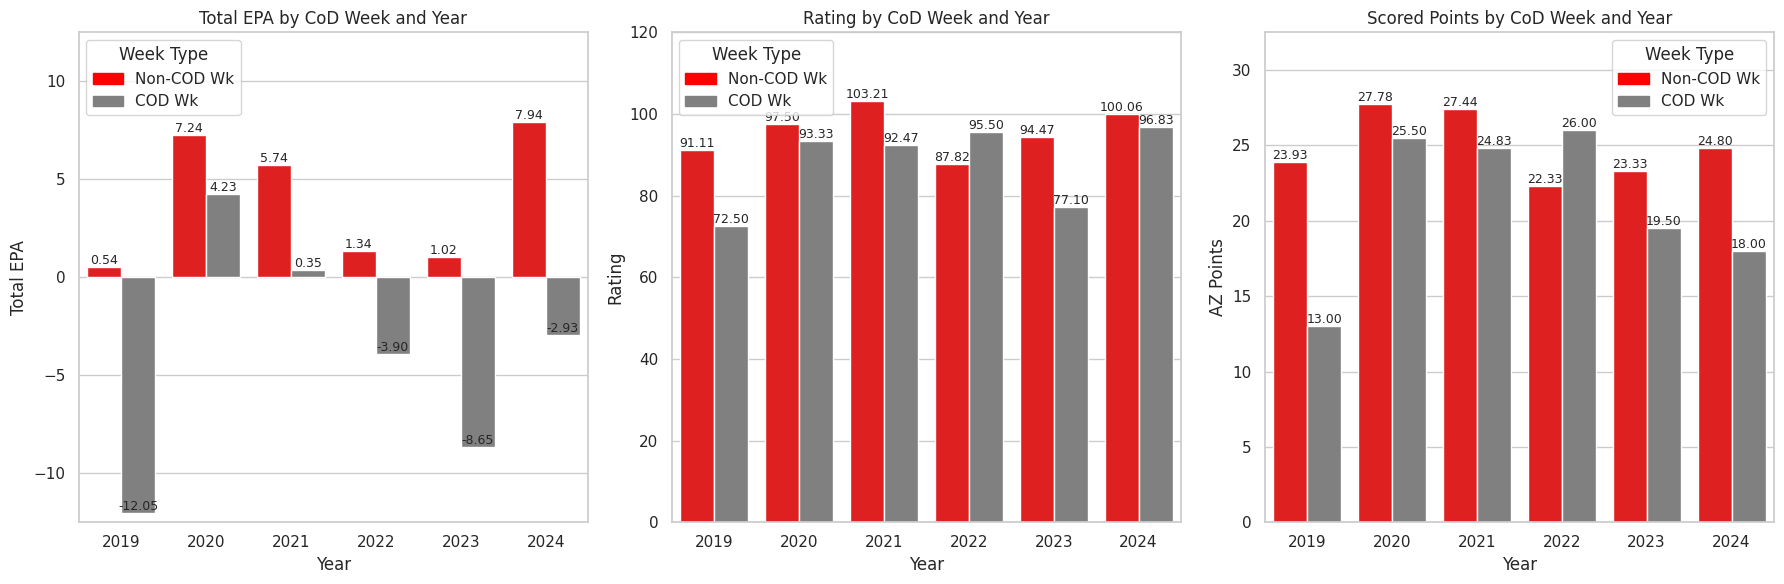

In [ ]:
grouped_df = murray_df.groupby(['is_cod_week', 'Season']).agg({
    'Total EPA': 'mean',
    'Rating': 'mean',
    'AZ Points': 'mean'
}).reset_index()

sns.set(style='whitegrid')

columns_to_plot = ['Total EPA', 'Rating', 'AZ Points']
titles = ['Total EPA by CoD Week and Year', 'Rating by CoD Week and Year', 'Scored Points by CoD Week and Year']


custom_palette = {0: 'red', 1: 'gray'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.barplot(
        data=grouped_df,
        x='Season',
        y=column,
        hue='is_cod_week',
        palette=custom_palette,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    legend_handles = [
    mpatches.Patch(color='red', label='Non-COD Wk'),
    mpatches.Patch(color='gray', label='COD Wk')
    ]

    if i == 0:
      ax.set_ylim(-12.5, 12.5)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper left' )
    elif i == 1:
      ax.set_ylim(0, 120)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper left' )
    elif i == 2:
      ax.set_ylim(0, 32.5)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper right' )

    for p in ax.patches:
      if p.get_height() != 0:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )


plt.tight_layout()
plt.show()

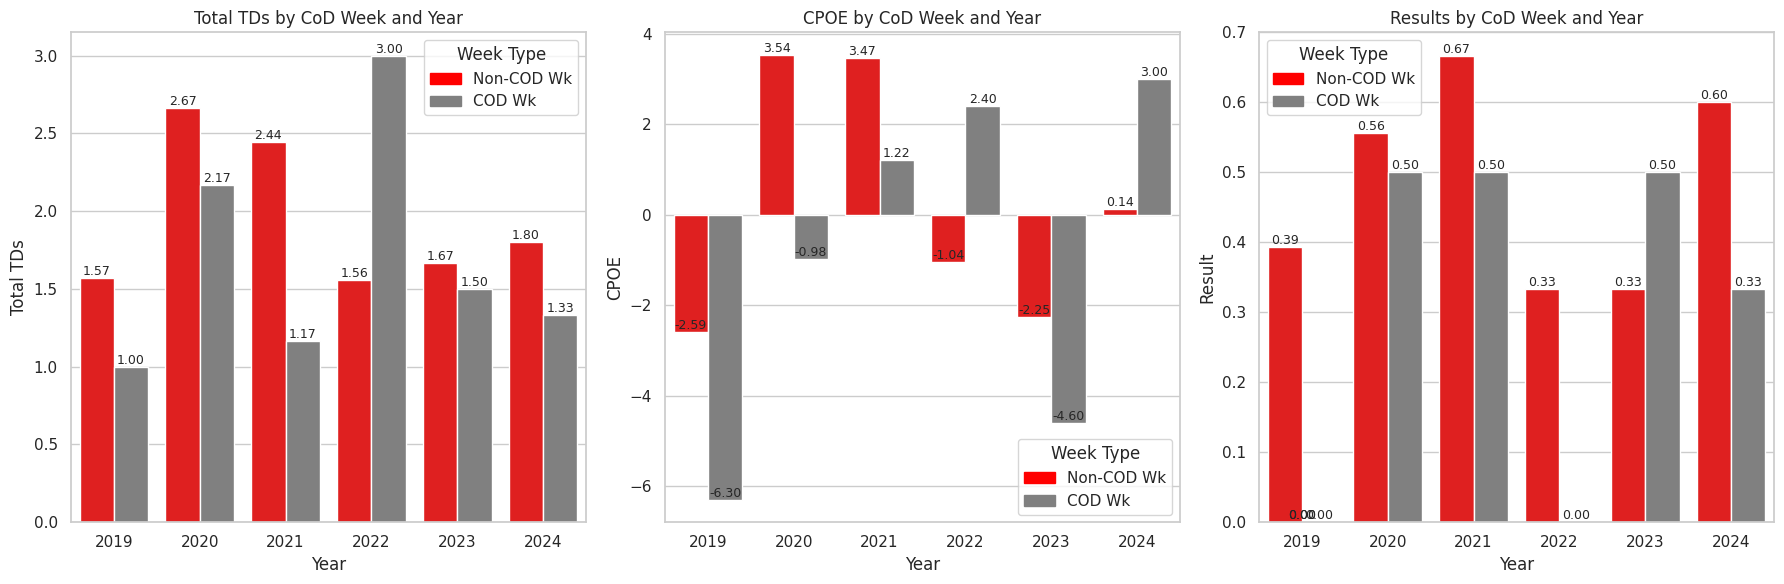

In [ ]:
grouped_df = murray_df.groupby(['is_cod_week', 'Season']).agg({
    'Total TDs': 'mean',
    'CPOE': 'mean',
    'Result': 'mean'
}).reset_index()

sns.set(style='whitegrid')

columns_to_plot = ['Total TDs', 'CPOE', 'Result']
titles = ['Total TDs by CoD Week and Year', 'CPOE by CoD Week and Year', 'Results by CoD Week and Year']


custom_palette = {0: 'red', 1: 'gray'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.barplot(
        data=grouped_df,
        x='Season',
        y=column,
        hue='is_cod_week',
        palette=custom_palette,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    legend_handles = [
    mpatches.Patch(color='red', label='Non-COD Wk'),
    mpatches.Patch(color='gray', label='COD Wk')
    ]
    ax.legend(handles = legend_handles, title = "Week Type")
    # if i == 0:
    #   ax.set_ylim(-12.5, 12.5)
    #   ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper left' )
    # elif i == 1:
    #   ax.set_ylim(0, 120)
    #   ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper left' )
    # elif i == 2:
    #   ax.set_ylim(0, 32.5)
    #   ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper right' )

    for p in ax.patches:
      if p.get_height() != 0 or i == 2:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )


plt.tight_layout()
plt.show()

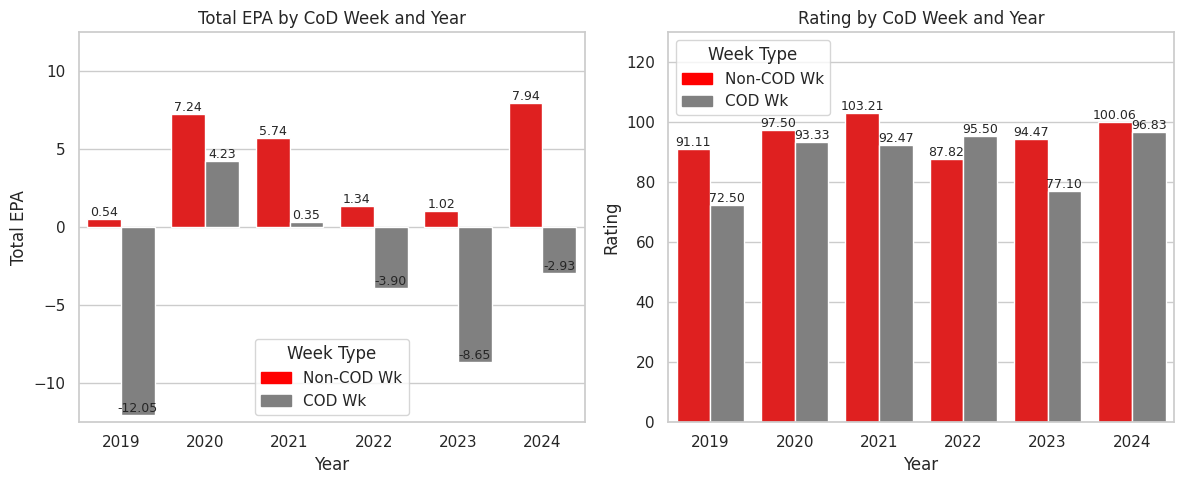

In [ ]:
grouped_df = murray_df.groupby(['is_cod_week', 'Season']).agg({
    'Total EPA': 'mean',
    'Rating': 'mean'
}).reset_index()

sns.set(style='whitegrid')

columns_to_plot = ['Total EPA', 'Rating']
titles = ['Total EPA by CoD Week and Year', 'Rating by CoD Week and Year']


custom_palette = {0: 'red', 1: 'gray'}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.barplot(
        data=grouped_df,
        x='Season',
        y=column,
        hue='is_cod_week',
        palette=custom_palette,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    legend_handles = [
    mpatches.Patch(color='red', label='Non-COD Wk'),
    mpatches.Patch(color='gray', label='COD Wk')
    ]
    #ax.legend(handles = legend_handles, title = "Week Type", loc = 'best')

    if i == 0:
      ax.set_ylim(-12.5, 12.5)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'best' )
    elif i == 1:
      ax.set_ylim(0, 130)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'upper left' )

    for p in ax.patches:
      if p.get_height() != 0 or i == 2:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )


plt.tight_layout()
plt.show()

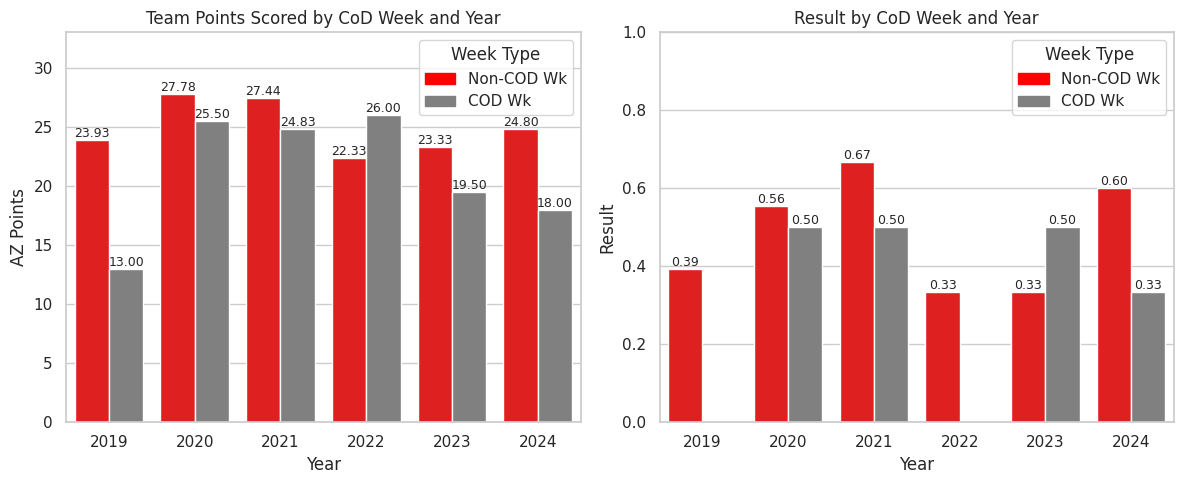

In [ ]:
grouped_df = murray_df.groupby(['is_cod_week', 'Season']).agg({
    'AZ Points': 'mean',
    'Result': 'mean'
}).reset_index()

sns.set(style='whitegrid')

columns_to_plot = ['AZ Points', 'Result']
titles = ['Team Points Scored by CoD Week and Year', 'Result by CoD Week and Year']


custom_palette = {0: 'red', 1: 'gray'}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.barplot(
        data=grouped_df,
        x='Season',
        y=column,
        hue='is_cod_week',
        palette=custom_palette,
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Year')
    ax.set_ylabel(column)
    legend_handles = [
    mpatches.Patch(color='red', label='Non-COD Wk'),
    mpatches.Patch(color='gray', label='COD Wk')
    ]
    #ax.legend(handles = legend_handles, title = "Week Type", loc = 'best')

    if i == 0:
      ax.set_ylim(0, 33)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'best' )
    elif i == 1:
      ax.set_ylim(0, 1)
      ax.legend(handles = legend_handles, title = "Week Type", loc = 'best' )

    for p in ax.patches:
      if p.get_height() != 0 or i == 2:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )


plt.tight_layout()
plt.show()

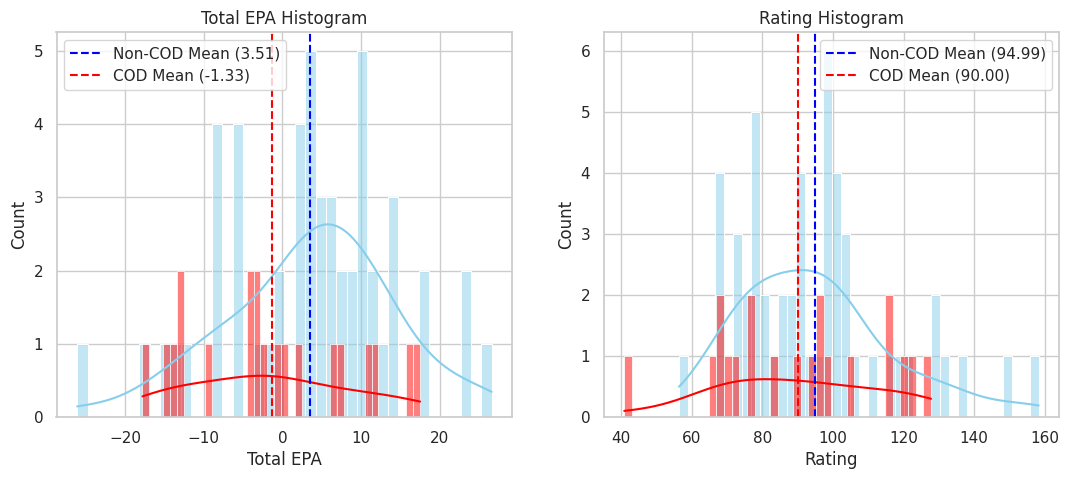

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 0]['Total EPA'], kde = True, bins = 40, color = 'skyblue')
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 1]['Total EPA'], kde = True, bins = 40, color = 'red')
plt.axvline(murray_df[murray_df['is_cod_week'] == 0]['Total EPA'].mean(), color='blue', linestyle='--',
            label=f"Non-COD Mean ({murray_df[murray_df['is_cod_week'] == 0]['Total EPA'].mean():.2f})")
plt.axvline(murray_df[murray_df['is_cod_week'] == 1]['Total EPA'].mean(), color='red', linestyle='--',
            label=f"COD Mean ({murray_df[murray_df['is_cod_week'] == 1]['Total EPA'].mean():.2f})")
plt.title("Total EPA Histogram")
plt.xlabel('Total EPA')
plt.legend()

plt.subplot(1,3,2)
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 0]['Rating'], kde = True, bins = 40, color = 'skyblue')
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 1]['Rating'], kde = True, bins = 40, color = 'red')
plt.axvline(murray_df[murray_df['is_cod_week'] == 0]['Rating'].mean(), color='blue', linestyle='--',
            label=f"Non-COD Mean ({murray_df[murray_df['is_cod_week'] == 0]['Rating'].mean():.2f})")
plt.axvline(murray_df[murray_df['is_cod_week'] == 1]['Rating'].mean(), color='red', linestyle='--',
            label=f"COD Mean ({murray_df[murray_df['is_cod_week'] == 1]['Rating'].mean():.2f})")

plt.title("Rating Histogram")
plt.xlabel('Rating')
plt.legend()

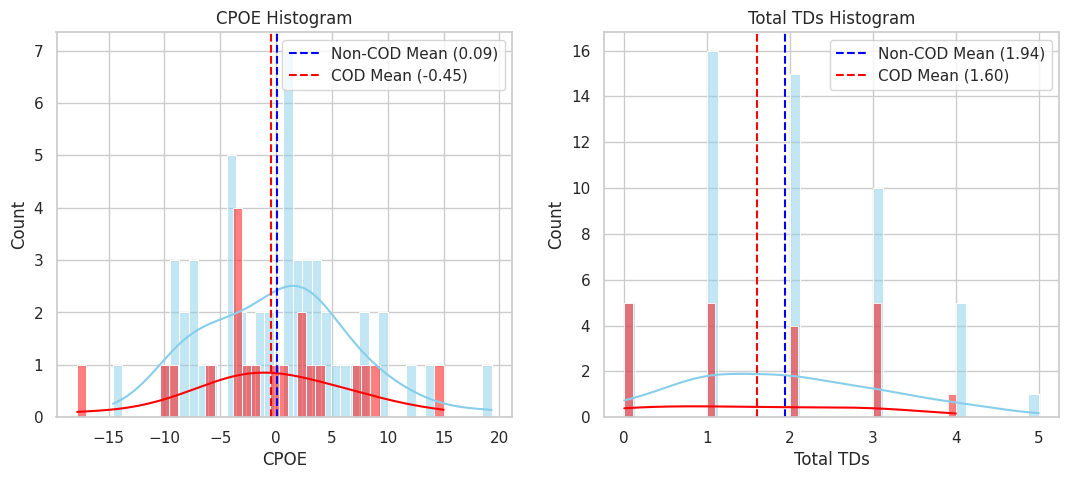

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 0]['CPOE'], kde = True, bins = 40, color = 'skyblue')
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 1]['CPOE'], kde = True, bins = 40, color = 'red')
plt.axvline(murray_df[murray_df['is_cod_week'] == 0]['CPOE'].mean(), color='blue', linestyle='--',
            label=f"Non-COD Mean ({murray_df[murray_df['is_cod_week'] == 0]['CPOE'].mean():.2f})")
plt.axvline(murray_df[murray_df['is_cod_week'] == 1]['CPOE'].mean(), color='red', linestyle='--',
            label=f"COD Mean ({murray_df[murray_df['is_cod_week'] == 1]['CPOE'].mean():.2f})")
plt.title("CPOE Histogram")
plt.xlabel('CPOE')
plt.legend()

plt.subplot(1,3,2)
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 0]['Total TDs'], kde = True, bins = 40, color = 'skyblue')
sns.histplot(data = murray_df[murray_df['is_cod_week'] == 1]['Total TDs'], kde = True, bins = 40, color = 'red')
plt.axvline(murray_df[murray_df['is_cod_week'] == 0]['Total TDs'].mean(), color='blue', linestyle='--',
            label=f"Non-COD Mean ({murray_df[murray_df['is_cod_week'] == 0]['Total TDs'].mean():.2f})")
plt.axvline(murray_df[murray_df['is_cod_week'] == 1]['Total TDs'].mean(), color='red', linestyle='--',
            label=f"COD Mean ({murray_df[murray_df['is_cod_week'] == 1]['Total TDs'].mean():.2f})")

plt.title("Total TDs Histogram")
plt.xlabel('Total TDs')
plt.legend()

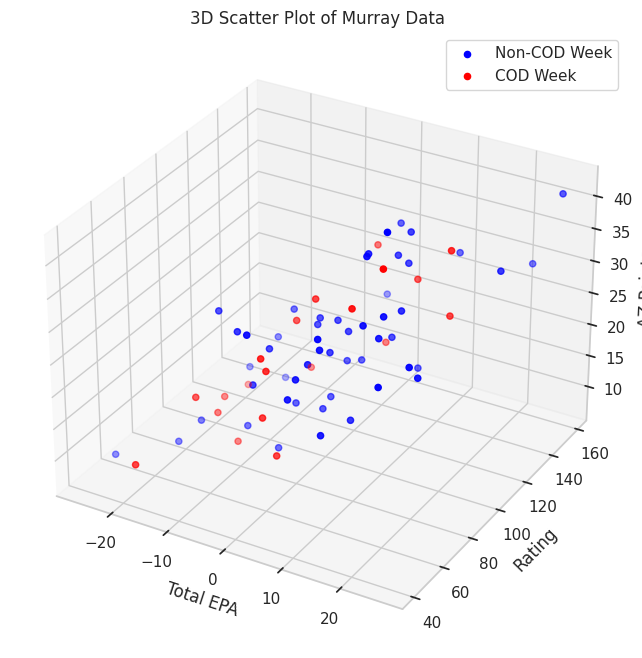

In [ ]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(murray_df[murray_df['is_cod_week'] == 0]["Total EPA"],
                     murray_df[murray_df['is_cod_week'] == 0]["Rating"],
                     murray_df[murray_df['is_cod_week'] == 0]["AZ Points"],
                     c = 'Blue')

scatter2 = ax.scatter(murray_df[murray_df['is_cod_week'] == 1]["Total EPA"],
                      murray_df[murray_df['is_cod_week'] == 1]["Rating"],
                      murray_df[murray_df['is_cod_week'] == 1]["AZ Points"],
                      c = 'Red')

ax.set_xlabel("Total EPA")
ax.set_ylabel("Rating")
ax.set_zlabel("AZ Points")

ax.set_title("3D Scatter Plot of Murray Data")

plt.legend([scatter, scatter2], ["Non-COD Week", "COD Week"])

plt.show()

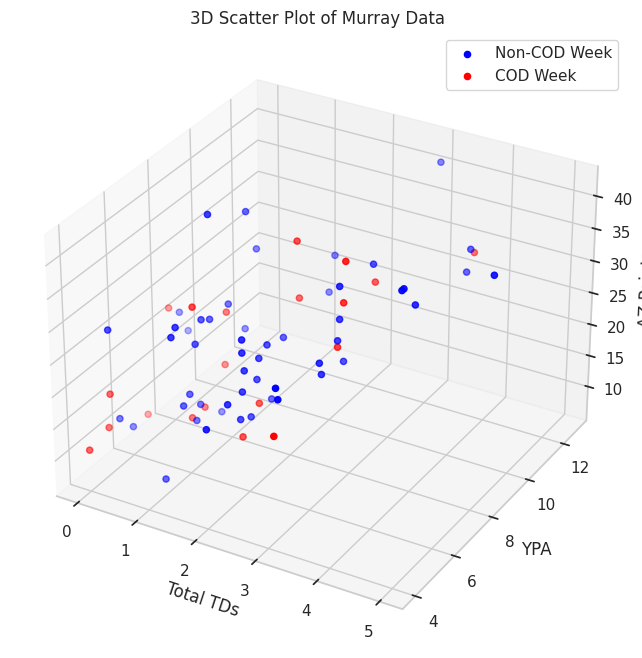

In [ ]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(murray_df[murray_df['is_cod_week'] == 0]["Total TDs"],
                     murray_df[murray_df['is_cod_week'] == 0]["YPA"],
                     murray_df[murray_df['is_cod_week'] == 0]["AZ Points"],
                     c = 'Blue')

scatter2 = ax.scatter(murray_df[murray_df['is_cod_week'] == 1]["Total TDs"],
                      murray_df[murray_df['is_cod_week'] == 1]["YPA"],
                      murray_df[murray_df['is_cod_week'] == 1]["AZ Points"],
                      c = 'Red')

ax.set_xlabel("Total TDs")
ax.set_ylabel("YPA")
ax.set_zlabel("AZ Points")

ax.set_title("3D Scatter Plot of Murray Data")

plt.legend([scatter, scatter2], ["Non-COD Week", "COD Week"])

plt.show()

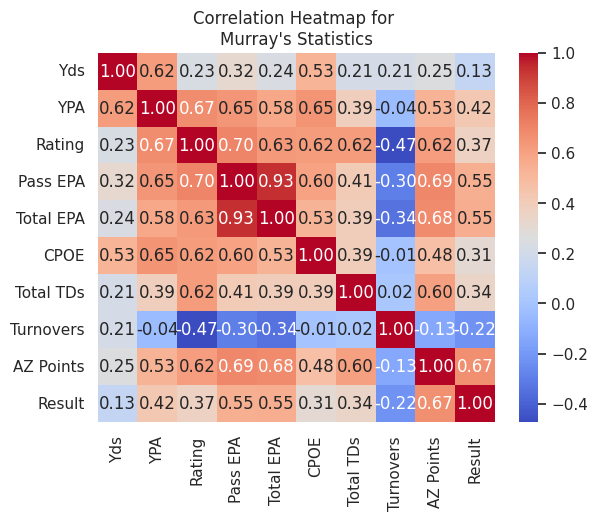

In [ ]:
sns.heatmap(murray_df[[ 'Yds', 'YPA', 'Rating', 'Pass EPA', 'Total EPA', 'CPOE',
                       'Total TDs', 'Turnovers', 'AZ Points', 'Result']].corr(), cmap = 'coolwarm', annot = True, fmt=".2f")
plt.title("Correlation Heatmap for \nMurray's Statistics")
plt.show()

#Testing

In [ ]:
#murray_df.groupby("is_cod_week").count()


# t_test, p_value = ttest_ind(murray_df[murray_df['is_cod_week'] == 0]['CPOE'], murray_df[murray_df['is_cod_week'] == 1]['CPOE'])

# print(f"t-statistic: {t_test}")
# print(f"p-value: {p_value}")

# t_test, p_value = ttest_ind(murray_df[murray_df['is_cod_week'] == 0]['Yds'], murray_df[murray_df['is_cod_week'] == 1]['Yds'])

# print(f"t-statistic: {t_test}")
# print(f"p-value: {p_value}")



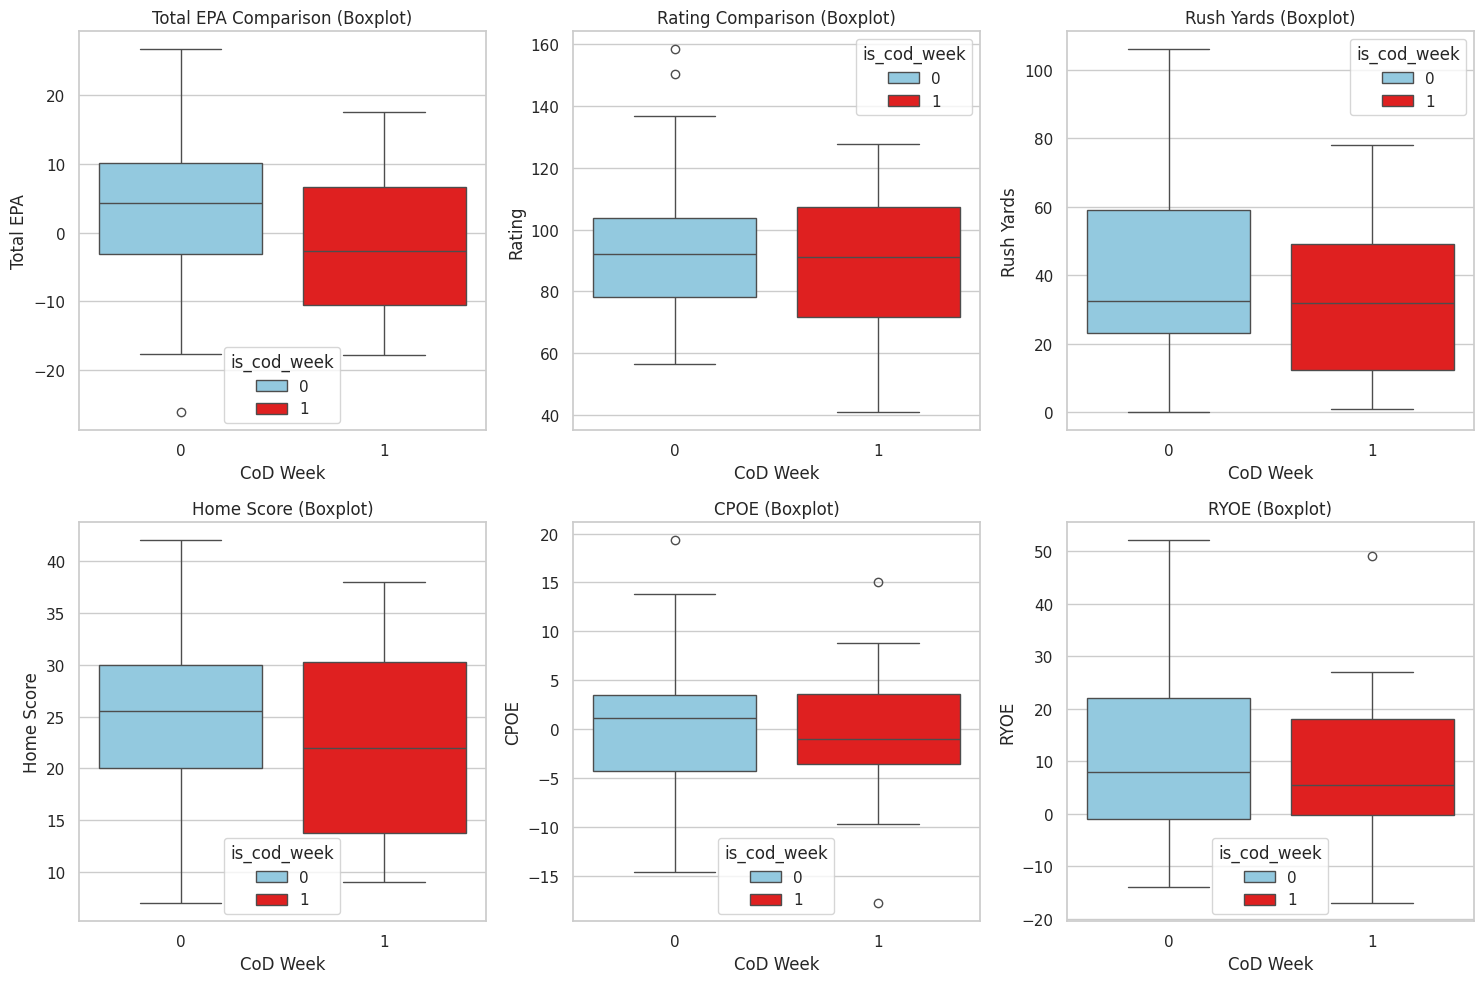

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='is_cod_week', y='Total EPA', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge=False)
plt.title("Total EPA Comparison (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('Total EPA')

plt.subplot(2, 3, 2)
sns.boxplot(x='is_cod_week', y='Rating', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge = False)
plt.title("Rating Comparison (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('Rating')

plt.subplot(2, 3, 3)
sns.boxplot(x='is_cod_week', y='Rush Yards', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge = False)
plt.title("Rush Yards (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('Rush Yards')

plt.subplot(2, 3, 4)
sns.boxplot(x='is_cod_week', y='AZ Points', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge = False)
plt.title("Home Score (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('Home Score')

plt.subplot(2, 3, 5)
sns.boxplot(x='is_cod_week', y='CPOE', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge = False)
plt.title("CPOE (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('CPOE')

plt.subplot(2, 3, 6)
sns.boxplot(x='is_cod_week', y='RYOE', data=murray_df, hue = 'is_cod_week', palette={0: 'skyblue', 1: 'red'}, dodge = False)
plt.title("RYOE (Boxplot)")
plt.xlabel('CoD Week')
plt.ylabel('RYOE')


plt.tight_layout()
plt.show()